In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
n_perturb = {
    'gpt-2': {
        'xsum': np.array([0.765, 0.895, 0.975, 0.973]),
        'squad': np.array([0.757, 0.896, 0.963, 0.963]),
        'writing': np.array([0.738, 0.904, 0.952, 0.965])
    },
    'gpt-J': {
        'xsum': np.array([0.714, 0.798, 0.893, 0.906]),
        'squad': np.array([0.666, 0.722, 0.824, 0.824]),
        'writing': np.array([0.596, 0.821, 0.878, 0.881])
    }
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


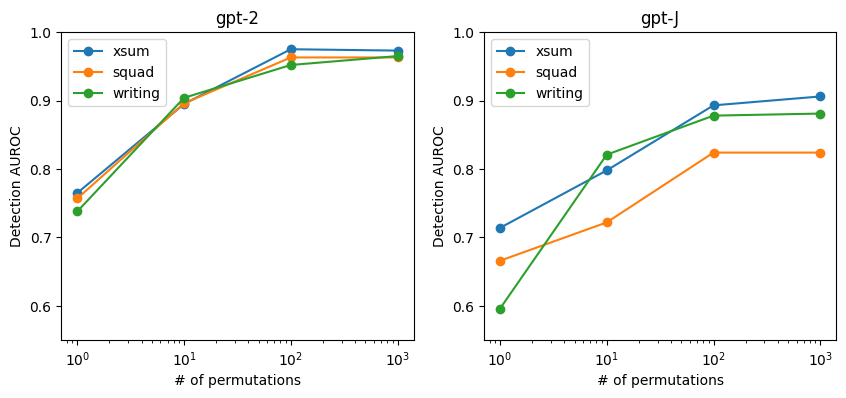

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=len(n_perturb), figsize=(10, 4))

n = np.array([1, 10, 100, 1000])
for i, (model_name, scores) in enumerate(n_perturb.items()):
    ax[i].set_title(model_name)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('# of permutations')
    ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.55, 1)
    ax[i].set_yticks(np.arange(0.6, 1.01, 0.1))
    for dataset_name, aurocs in scores.items():
        ax[i].plot(n, aurocs, label=dataset_name, marker='o', mew=1)
    ax[i].legend()

fig.savefig('n_perturb.eps')

In [37]:
scale = {
    '5 perturbations': {
        'GPT2-sm': {'rand_d': 0.760, 'rand_z': 0.589, 'mask': np.array([0.746, 0.896, 0.967, 0.971])},
        'GPT2-md': {'rand_d': 0.735, 'rand_z': 0.523, 'mask': np.array([0.639, 0.799, 0.905, 0.957])},
        'GPT2-lg': {'rand_d': 0.729, 'rand_z': 0.548, 'mask': np.array([0.608, 0.737, 0.878, 0.926])},
        'GPT2-xl': {'rand_d': 0.726, 'rand_z': 0.576, 'mask': np.array([0.621, 0.742, 0.831, 0.920])}
    },
    '25 perturbations': {
        'GPT2-sm': {'rand_d': 0.869, 'rand_z': 0.526, 'mask': np.array([0.828, 0.980, 0.998, 0.999])},
        'GPT2-md': {'rand_d': 0.864, 'rand_z': 0.537, 'mask': np.array([0.740, 0.916, 0.975, 0.996])},
        'GPT2-lg': {'rand_d': 0.742, 'rand_z': 0.532, 'mask': np.array([0.739, 0.888, 0.962, 0.993])},
        'GPT2-xl': {'rand_d': 0.849, 'rand_z': 0.530, 'mask': np.array([0.700, 0.851, 0.941, 0.984])}
    }
}

NOTE: For some reason the AUROC for the random filling setting for normalized (z) discrepancy is always very low (~0.5), but for non-normalized discrepancy (d) it's not. We report the latter, as it seems that in the paper the latter was reported, judging by their graphs, although this was never explicitly mentioned. This should be stated in the caption.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


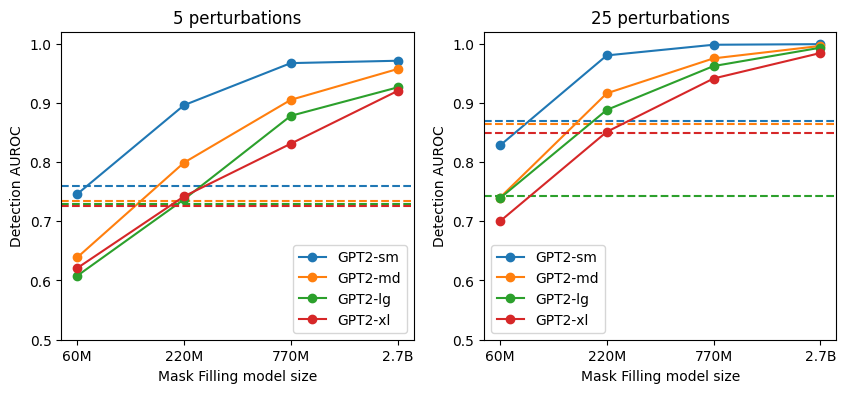

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=len(scale), figsize=(10, 4))

mask_model_sizes = ['60M', '220M', '770M', '2.7B']
for i, (num_perturb, scores) in enumerate(scale.items()):
    ax[i].set_title(num_perturb)
    ax[i].set_xlabel('Mask Filling model size')
    ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.5, 1.02)
    ax[i].set_yticks(np.arange(0.5, 1.01, 0.1))
    x_ticks = np.arange(len(mask_model_sizes))
    ax[i].set_xticks(x_ticks)
    for model_name, aurocs in scores.items():
        color = ax[i].plot(x_ticks, aurocs['mask'], label=model_name, marker='o', mew=1)[0].get_color()
        ax[i].axhline(aurocs['rand_d'], color=color, linestyle='--')
    ax[i].set_xticklabels(mask_model_sizes)
    ax[i].legend()

fig.savefig('scale.eps')